In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs,make_classification

sns.set_theme(style='whitegrid')

In [170]:
X,y = make_blobs(n_samples=100,n_features=2,centers=[[0,0],[6,6]],cluster_std=1,random_state=0)
y = np.where(y==0,-1,1)

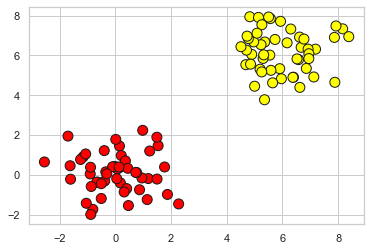

In [171]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn',s=100,edgecolor='k')

In [147]:
class SoftSVM():
    def __init__(self,C):
        self.C = C
        
    def __decesion_function(self,X):
        return X@self.w + self.b
    
    def __margin(self,X,y):
        return y*self.__decesion_function(X)
    
    def __cost(self,margin):
        return (1/2)*(np.transpose(self.w)@self.w) + self.C*np.sum((np.maximum(0,1-margin)))
    
    def fit(self,X,y,lr=0.001,epochs=500):
        self.w = np.random.randn(X.shape[-1])
        self.b = np.random.randn()
        self.X = X
        self.y = y
        loss_array = []
        weights_all = []
        
        for _ in range(epochs):
            margin = self.__margin(X,y)
            loss_array.append(self.__cost(margin))
            
            missclassified_points = np.where(margin <1)[0]
            weights_all.append(self.w)
            d_w = self.w - self.C*(y[missclassified_points].dot(X[missclassified_points]))
            self.w -= lr*d_w
            
            d_b = -self.C*np.sum(y[missclassified_points])
            self.b -= lr*d_b
            
        
        self.support_vectors = np.where(self.__margin(X,y)<=1)[0]
            
        return loss_array,weights_all
    
    def predict(self,X):
        return np.sign(self.__decesion_function(X))
    
    
    def score(self,X,y):
        P = self.predict(X)
        return np.mean(P)
        
    def plot_decesion_boundary(self,X,y):
            plt.scatter(self.X[:,0],self.X[:,1],c = self.y,marker='o',s=100,cmap='autumn')
            ax = plt.gca()
            xlim = ax.get_xlim()
            ylim = ax.get_ylim()
            
            xx = np.linspace(xlim[0],xlim[1],30)
            yy = np.linspace(ylim[0],ylim[1],30)
            
            YY,XX = np.meshgrid(yy,xx)
            
            xy = np.vstack([XX.ravel(),YY.ravel()]).T
            Z = self.__decesion_function(xy).reshape(XX.shape)
            
            
            
            ax.contour(XX,YY,Z,colors=['g','k','g'],levels=[-1,0,1],linestyles=['--','-','--'],linewidths = [2.0,2.0,2.0])
            
            
            ax.scatter(self.X[:,0][self.support_vectors],self.X[:,1][self.support_vectors],s=250,linewidth=1,
                      facecolor='none',edgecolor='k')
            
            plt.xlabel("x1")
            plt.ylabel('x2')
            
            plt.show()

In [148]:
svm = SoftSVM(C=1)

In [149]:
loss,error = svm.fit(X,y)

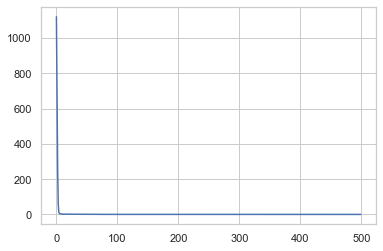

In [150]:
plt.plot(loss)

In [151]:
error[0],error[-1]

(array([-0.09123259,  0.50821095]), array([-0.09123259,  0.50821095]))

In [152]:
loss[0],loss[-1]

(1121.478288697035, 0.13356788100621686)

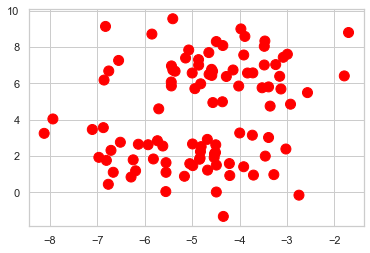

In [153]:
plt.scatter(X[:,0],X[:,1],c = y,marker='o',s=100,cmap='autumn')

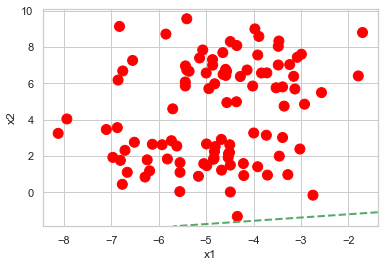

In [154]:
svm.plot_decesion_boundary(X,y)

# New Example

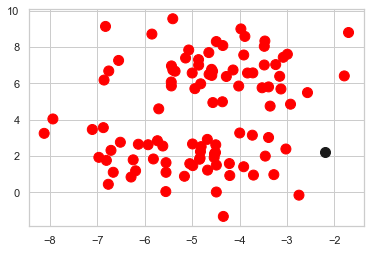

In [155]:
newExample = np.array([-2.2,2.2])
plt.scatter(X[:,0],X[:,1],c = y,marker='o',s=100,cmap='autumn')
plt.scatter(newExample[0],newExample[1],marker='o',s=100,c='k')

In [156]:
svm.predict(newExample)

1.0

# Linearly seperable dataset with noise

In [157]:
X_new,y_new = make_blobs(n_samples=100,n_features=2,cluster_std=1.1,centers=2)
y = np.where(y==0,-1,1)

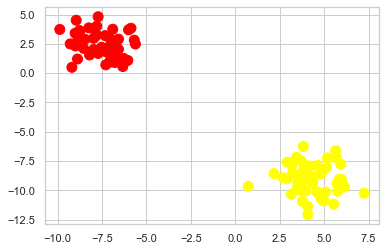

In [158]:
plt.scatter(X_new[:,0],X_new[:,1],c = y_new,marker='o',s=100,cmap='autumn')

In [161]:
svm = SoftSVM(C=1)
errors,weights = svm.fit(X_new,y_new)
errors[-1]

50.131689089158044

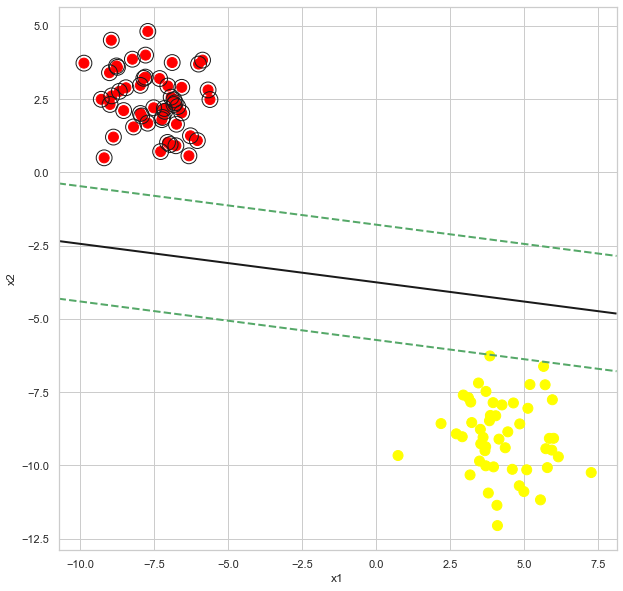

In [162]:
plt.figure(figsize=(10,10))
svm.plot_decesion_boundary(X_new,y_new)

In [199]:
import numpy as np
class fit_softSVM:
    def __init__(self, C=15):
      """
      Initialize the values
      """
      self.C = C
      self.w = None
      self.b = None
      

    def __decision_function(self, X):
        return X@self.w + self.b
 
    def __cost(self, margin):
        return (1/2)*(np.transpose(self.w)@self.w) + self.C*(np.sum(np.maximum(0,1-margin)))
      
  
    def __margin(self, X, y):
        return y*self.__decision_function(X)
 
    def fit(self, X, y, lr=0.01, epochs=100):
        self.w = np.zeros(X.shape[-1])
        self.b = 0
      
        for _ in range(epochs):
            margin = self.__margin(X,y)
          
            missclassified_points = np.where(margin<1)[0]
            d_w = self.w -self.C*(y[missclassified_points].dot(X[missclassified_points]))
            self.w -= lr*d_w
          
            d_b = -self.C*np.sum(y[missclassified_points])
            self.b -= lr*d_b 
          
 
    def predict(self, X):
        return np.sign(self.__decision_function(X))  
 
    def score(self, X, y):
        P = self.predict(X)
        return np.sum(np.where(P==y,1,0))

#     def compute_accuracy(X_train, y_train, X_test,  y_test):
#       """
#       fits the model and returns the accuracy of the model
#       """
#       pass


In [200]:
svm2 = fit_softSVM()

In [201]:
svm2.fit(X,y)

In [202]:
svm2.predict(X)

array([-1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
        1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,
       -1., -1.,  1., -1., -1.,  1., -1.,  1., -1.])

In [203]:
y

array([-1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
        1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,
        1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1])

In [204]:
svm2.score(X,y)

100